In [29]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
url=url = "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv"
df=pd.read_csv(url)

In [17]:
X = df[['TV', 'Radio', 'Newspaper']]
X = sm.add_constant(X)
Y=df['Sales']

# fiting to the model 

model=sm.OLS(Y,X).fit()


In [19]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.58e-96
Time:                        23:10:22   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

<AxesSubplot: ylabel='Density'>

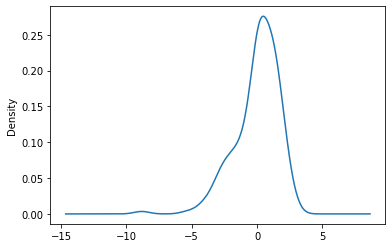

In [24]:
model.resid.plot(kind='kde')

In [46]:
omnibus ,p_value=sm.stats.omni_normtest(model.resid)

In [56]:
residuals=model.resid
mean = np.mean(residuals)
std = np.std(residuals)
skewness = (np.sum((residuals - mean)**3) / (len(residuals) * std**3))
kurtosis = np.sum((residuals - mean)**4) / (len(residuals) * std**4)-3

# Calculate the Omnibus test statistic
n = len(residuals)
omnibus = (skewness**2 + kurtosis**2) * n / 4

# Calculate the p-value of the test
p_value = 1 - stats.chi2.cdf(omnibus, 2)

print("Omnibus test statistic:", omnibus)
print("p-value:", p_value)

Omnibus test statistic: 643.1683642939627
p-value: 0.0


In [79]:
x=df['Radio']

In [87]:
# Coefficients
const_coef = 2.9389
TV_coef = 0.0458
Radio_coef = 0.1885
Newspaper_coef = -0.0010

# Standard errors
const_se = 0.312
TV_se = 0.001
Radio_se = 0.009
Newspaper_se = 0.006

# Degrees of freedom
df =  len(x)- 1

# t-values
const_t = const_coef / const_se
TV_t = TV_coef / TV_se
Radio_t = Radio_coef / Radio_se
Newspaper_t = Newspaper_coef / Newspaper_se

# p-values
const_p = stats.t.sf(abs(const_t), df) * 2
TV_p = stats.t.sf(abs(TV_t), df) * 2
Radio_p = stats.t.sf(abs(Radio_t), df) * 2
Newspaper_p = stats.t.sf(abs(Newspaper_t), df) * 2

# Output results
print(f"{'Variable':<10} {'Coefficients':<15} {'SE':<10} {'t-value':<10} {'p-value':<10}")
print(f"{'Constant':<10} {const_coef:<15.4f} {const_se:<10.4f} {const_t:<10.4f} {const_p:<10.4f}")
print(f"{'TV':<10} {TV_coef:<15.4f} {TV_se:<10.4f} {TV_t:<10.4f} {TV_p:<10.4f}")
print(f"{'Radio':<10} {Radio_coef:<15.4f} {Radio_se:<10.4f} {Radio_t:<10.4f} {Radio_p:<10.4f}")
print(f"{'Newspaper':<10} {Newspaper_coef:<15.4f} {Newspaper_se:<10.4f} {Newspaper_t:<10.4f} {Newspaper_p:<10.4f}")


Variable   Coefficients    SE         t-value    p-value   
Constant   2.9389          0.3120     9.4196     0.0000    
TV         0.0458          0.0010     45.8000    0.0000    
Radio      0.1885          0.0090     20.9444    0.0000    
Newspaper  -0.0010         0.0060     -0.1667    0.8678    


In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate some sample data
np.random.seed(123)
x1 = np.random.normal(size=100)
x2 = np.random.normal(size=100)
x3 = np.random.normal(size=100)

y = 2*x1 + 3*x2 + 5*x3 + np.random.normal(size=100)

# Create a dataframe with the independent variables and the dependent variable
data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})
data['x4'] = np.random.normal(size=100)
data['x5'] = np.random.gamma(1,10,100)

# Fit a linear regression model using all five variables
model = LinearRegression().fit(data[['x1', 'x2', 'x3', 'x4', 'x5']], data['y'])

# Calculate the R² score
r2_with_irrelevant = r2_score(data['y'], model.predict(data[['x1', 'x2', 'x3', 'x4', 'x5']]))

# Calculate the adjusted R² score
n = len(data)
k = 5  # number of independent variables
adj_r2 = 1 - ((1 - r2_with_irrelevant) * (n - 1) / (n - k - 1))


print(f"R² score with irrelevant variables: {r2_with_irrelevant:.3f}")
print(f"Adjusted R² score with irrelevant variables: {adj_r2:.3f}")


R² score with irrelevant variables: 0.981
Adjusted R² score with irrelevant variables: 0.980


In [16]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate random data with 10 observations and 3 features
X = np.random.randn(10, 3)
y = X[:,0] + 2*X[:,1] + np.random.randn(10)

# Fit a linear regression model with all three features
reg = LinearRegression().fit(X, y)

# Calculate the R² score for the model
r2 = r2_score(y, reg.predict(X))
print("R² score with all features:", r2)

# Add two irrelevant columns to the data
X_new = np.hstack([X, np.random.randn(10, 2)])

# Fit a linear regression model with all five features
reg_new = LinearRegression().fit(X_new, y)

# Calculate the R² score for the new model
r2_new = r2_score(y, reg_new.predict(X_new))
print("R² score with two irrelevant features:", r2_new)

# Calculate the adjusted R² score for the new model
n = X_new.shape[0]
k = X_new.shape[1]
adj_r2_new = 1 - ((1 - r2_new) * (n - 1) / (n - k - 1))
print("Adjusted R² score with two irrelevant features:", adj_r2_new)


R² score with all features: 0.8034964491883647
R² score with two irrelevant features: 0.8571405700172106
Adjusted R² score with two irrelevant features: 0.6785662825387238
